In [ ]:
# This to show speed of parsing 50Mb DXF in Python
# including display

In [1]:
import ezdxf, time, os
fname = "/home/julian/Documents/FreeCAD/dxfloadingissues/SAMPLE DXF FILES/torso_uniform.dxf"
print("File size is %d bytes" % os.stat(fname).st_size)
t0 = time.time()
d = ezdxf.readfile(fname)
e = list(d.entities)
print("Time to parse: %f seconds" % (time.time() - t0))
print("There are %d entities"%len(e))

File size is 54618242 bytes
Time to parse: 35.679078 seconds
There are 284692 entities


In [2]:
# compact the triangles into a mesh
import sys
sys.path.append("..")
from tribarmes import TriangleBarMesh

In [3]:
t0 = time.time()
flat9triangles = [ ]
for t in e:
    flat9triangles.append(list(t.dxf.vtx0)+list(t.dxf.vtx1)+list(t.dxf.vtx2))
tbm = TriangleBarMesh(flat9triangles=flat9triangles)
print("saved %d of %d points in %f seconds" % (len(e)*3 - len(tbm.nodes), len(e)*3, time.time() - t0))

saved 711728 of 854076 points in 12.884996 seconds


In [4]:
# build and plot figure
import numpy
x = numpy.array([node.p.x  for node in tbm.nodes])
y = numpy.array([node.p.y  for node in tbm.nodes])
z = numpy.array([node.p.z  for node in tbm.nodes])
triangles = [ ]
for bar in tbm.bars:
    if bar.barforeright:
        node2 = bar.barforeright.GetNodeFore(bar.nodefore == bar.barforeright.nodeback)
        if node2.i > bar.nodeback.i:
            node0 = bar.nodeback
            node1 = bar.nodefore
            triangles.append((node0.i, node1.i, node2.i))
len(triangles)

284692

In [8]:
import ipyvolume as ipv
ipv.figure()
mesh = ipv.plot_trisurf(x, y, z, triangles=triangles, color='orange')
ipv.xyzlim(-0.5, 0.5)
ipv.show()

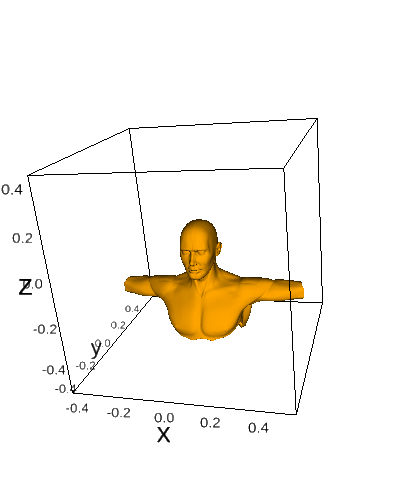

In [13]:
from matplotlib import pyplot as plt
import PIL
PIL.Image.open("/home/julian/Downloads/ipyvolume(2).png")